In [22]:
import pandas as pd
import numpy as np
import os
files = [
    "2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         "2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         "2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         ]
local_path = os.getcwd()
first = True
for file in files:
    print(os.path.join(local_path, 'Testdateien', 'LG', file))
    if first:
        df = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[0, 2], names=['ds','y'], header=0,
            parse_dates=['ds'],
            date_parser=lambda col: pd.to_datetime(col, utc=True).tz_localize(None)
        )
        first=False
    else:
        df1 = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[0, 2], names=['ds','y'], header=0,
            parse_dates=['ds'],
            date_parser=lambda col: pd.to_datetime(col, utc=True).tz_localize(None)
        )
        df = df.append(df1, ignore_index=True)
# df.head()
# df['ds'] = pd.to_datetime(df['ds'], utc=True)
# df['ds'] = df['ds'].dt.tz_localize(None)
df['index'] = df['ds']
df = df.set_index('index')
df = df.resample('1d').sum()
df.head()

/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv


,y
index,
2015-12-31,10572.7
2016-01-01,211316.0
2016-01-02,228389.1
2016-01-03,232880.7
2016-01-04,284659.5


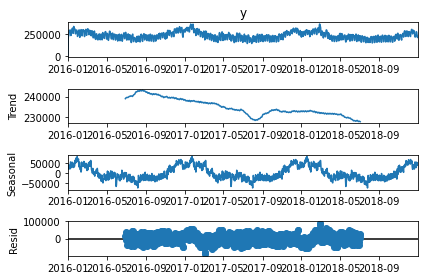

In [23]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose time series into daily trend, seasonal, and residual components.
# Note that the settlement price = average daily price.
decomp = seasonal_decompose(df['y'], period = 360)
# Plot the decomposed time series to interpret.
decomp.plot();

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['y'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# KPSS Test
stats, p, lags, critical_values = kpss(df['y'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')


ADF Statistic: -2.9969947142304436
p-value: 0.03517601089750252
Series is Stationary
KPSS Test Statistics: 0.11601414450519805
p-value: 0.1
Series is Stationary


/Users/marcomeo/PycharmProjects/schulungPython/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/marcomeo/PycharmProjects/schulungPython/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/marcomeo/PycharmProjects/schulungPython/venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 25.

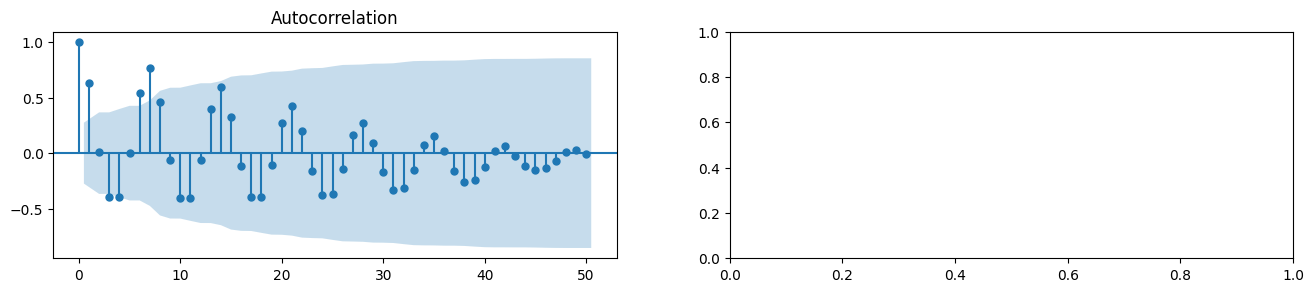

In [25]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df['y'], nlags=50)
pacf_50 = pacf(df['y'], nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(acf_50, lags=50, ax=axes[0])
plot_pacf(pacf_50, lags=50, ax=axes[1])

Text(0.5, 0.98, 'Additive Decompose')

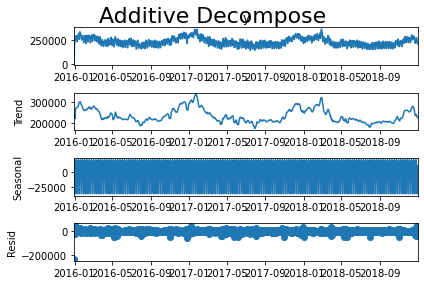

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
result_add = seasonal_decompose(df['y'], model='additive', extrapolate_trend='freq')
# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)